In [24]:
import intake
import xarray as xr
import warnings
import xesmf as xe
import matplotlib.pyplot as plt

In [2]:
cat = intake.open_esm_datastore("/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cmip6.json")

In [3]:
cat

,unique
activity_id,17
institution_id,35
source_id,81
experiment_id,130
member_id,421
table_id,36
variable_id,1075
grid_label,12
dcpp_init_year,59
version,597


In [4]:
cat.search(
    experiment_id="piControl",
    source_id="CESM2-FV2",
    member_id="r1i1p1f1",
    table_id="Omon",
    variable_id="zos"
).unique()

activity_id                                                       [CMIP]
institution_id                                                    [NCAR]
source_id                                                    [CESM2-FV2]
experiment_id                                                [piControl]
member_id                                                     [r1i1p1f1]
table_id                                                          [Omon]
variable_id                                                        [zos]
grid_label                                                      [gn, gr]
dcpp_init_year                                                        []
version                                                      [v20191120]
time_range             [000101-005012, 005101-010012, 010101-015012, ...
path                   [/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2...
derived_variable_id                                                   []
dtype: object

In [19]:
dss = cat.search(
        experiment_id="piControl",
        source_id="CESM2-FV2",
        member_id="r1i1p1f1",
        table_id="Amon",
        variable_id="tas",
        grid_label="gn",
        # time_range="185001-186912"
    ).to_dataset_dict(progressbar=False)
tas = next(iter(dss.values())).isel(time=0)
tas

/glade/work/dstiller/conda-envs/enspred/lib/python3.11/site-packages/xarray/conventions.py:432: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:         (member_id: 1, dcpp_init_year: 1, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * lat             (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon             (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    time            object 0001-01-15 12:00:00
    time_bnds       (nbnd) object dask.array<chunksize=(2,), meta=np.ndarray>
    lat_bnds        (lat, nbnd) float64 dask.array<chunksize=(96, 2), meta=np.ndarray>
    lon_bnds        (lon, nbnd) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: nbnd
Data variables:
    tas             (member_id, dcpp_init_year, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>
Attributes: (12/56)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             10950.0
    branch_time_in_parent:            0.0
    case_id:                          1548
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         v20191120
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           CMIP.NCAR.CESM2-FV2.piControl.Amon.gn

In [32]:
dss = cat.search(
        experiment_id="piControl",
        source_id="CESM2-FV2",
        member_id="r1i1p1f1",
        table_id="Amon",
        variable_id="tos",
        grid_label="gn",
        # time_range="185001-186912"
    ).to_dataset_dict(progressbar=False)
tos = next(iter(dss.values())).isel(time=0)
tos

/glade/work/dstiller/conda-envs/enspred/lib/python3.11/site-packages/pydantic/deprecated/decorator.py:222: UserWarning: There are no datasets to load! Returning an empty dictionary.
  return self.raw_function(**d, **var_kwargs)


StopIteration: 

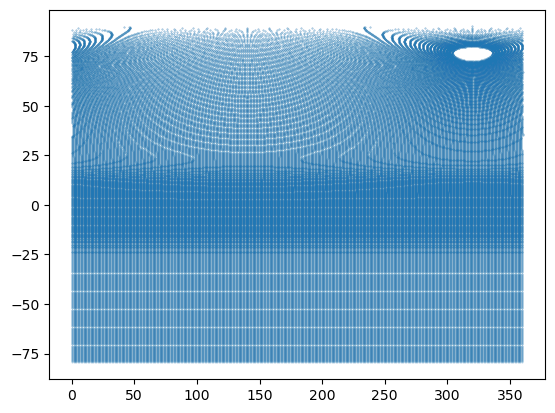

In [41]:
plt.scatter(tos["lon_bnds"], tos["lat_bnds"], s=0.1, alpha=.2)

In [45]:
regridder = xe.Regridder(tos, xe.util.grid_global(2, 2, lon1=359), "bilinear", ignore_degenerate=True)

/glade/work/dstiller/conda-envs/enspred/lib/python3.11/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


In [48]:
regridder(tos, keep_attrs=True)

<xarray.Dataset>
Dimensions:         (member_id: 1, dcpp_init_year: 1, y: 90, x: 180, d2: 2)
Coordinates:
    time            object 0001-01-15 13:00:00
    time_bnds       (d2) object dask.array<chunksize=(2,), meta=np.ndarray>
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
    lon             (y, x) float64 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
    lat             (y, x) float64 -89.0 -89.0 -89.0 -89.0 ... 89.0 89.0 89.0
Dimensions without coordinates: y, x, d2
Data variables:
    tos             (member_id, dcpp_init_year, y, x) float32 dask.array<chunksize=(1, 1, 90, 180), meta=np.ndarray>
Attributes: (12/57)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             10950.0
    branch_time_in_parent:            0.0
    case_id:                          1548
    ...                               ...
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         v20191120
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           CMIP.NCAR.CESM2-FV2.piControl.Omon.gn
    regrid_method:                    bilinear

In [25]:
tos

<xarray.Dataset>
Dimensions:         (member_id: 1, dcpp_init_year: 1, nlat: 384, nlon: 320,
                     d2: 2, vertices: 4)
Coordinates:
    lat             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lon             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * nlat            (nlat) int32 1 2 3 4 5 6 7 8 ... 378 379 380 381 382 383 384
  * nlon            (nlon) int32 1 2 3 4 5 6 7 8 ... 314 315 316 317 318 319 320
    time            object 0001-01-15 13:00:00
    time_bnds       (d2) object dask.array<chunksize=(2,), meta=np.ndarray>
    lat_bnds        (nlat, nlon, vertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
    lon_bnds        (nlat, nlon, vertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: d2, vertices
Data variables:
    tos             (member_id, dcpp_init_year, nlat, nlon) float32 dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
Attributes: (12/56)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             10950.0
    branch_time_in_parent:            0.0
    case_id:                          1548
    ...                               ...
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         v20191120
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           CMIP.NCAR.CESM2-FV2.piControl.Omon.gn